<h1 style="text-align: center;">Big Data Analysis Project</h1>

** **

## <p style="text-align: center;"><i>01 - Exploratory Data Analysis</i></p>

** **
<p style="text-align: center;">
David Cascão - 20240851 <br>
Jan-Louis Schneider - 20240506 <br>
Jorge Cordeiro - 20240594 <br>
Marta Boavida - 20240519 <br>
Sofia Gomes - 20240848
</p>


## <span style="color:#FF007F">  Notebook  </span> 

In this notebook, we do an initial exploration of the dataset. 



## <span style="color:#FF007F"> Table of Contents </span>

<a class="anchor" id="top"></a>

1. [Import Libraries](#one-bullet) <br>

2. [Import Datasets](#two-bullet) <br>

3. [Initial Exploration](#three-bullet) <br>

4. [Organize Vars](#four-bullet) <br>

5. [Data Types](#five-bullet) <br>

6. [Missing Values](#six-bullet) <br>

7. [Outliers](#seven-bullet) <br>
    
8. [Visualizations](#eight-bullet) <br> 

9. [Export Datasets](#nine-bullet) <br> 


<a class="anchor" id="one-bullet"></a>

## <span style="color:#FF007F"> 1. Import Libraries</span>

The first step is to import the necessary libraries.

In [0]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from math import ceil
from pyspark.sql.window import Window
from pyspark.sql import SparkSession
from pyspark.sql import Window
import pyspark.sql.functions as F

<a class="anchor" id="two-bullet"> 

## <span style="color:#FF007F"> 2. Import Datasets</span> 

<a href="#top">Top &#129033;</a>

Next, we start by importing the dataset and save it on the var df.

In [0]:
df = spark.read.csv("dbfs:/FileStore/tables/CHB_MIT.csv", header=True, inferSchema=True)

After that, we splited the data into train (70%), test (15%) and validation (15%).

In [0]:
# split data into first 70 % train set, then 15 % validation set and last 15 % test set.
n = df.count()

train_end = int(n * 0.7) 
val_end = int(n * 0.85)

window_spec = Window.orderBy(F.lit(1))
df = df.withColumn("index", F.row_number().over(window_spec) - 1)

train_df = df.filter(F.col("index") < train_end).drop("index")
val_df = df.filter((F.col("index") >= train_end) & (F.col("index") < val_end)).drop("index")
test_df = df.filter(F.col("index") >= val_end).drop("index")

#EXPLICAR AQUI PQ FOI ISSO

<a class="anchor" id="three-bullet"> 

## <span style="color:#FF007F"> 3. Initial Exploration</span> 

<a href="#top">Top &#129033;</a>

In order to better understand the dataset, we started by exploring it.

<span style="color:#FF007F"> 3.1. Get the first 10 rows of the dataset df </span> 

In [0]:
df.limit(10).display()

FP1-F7 F7-T7 T7-P7 P7-O1 FP1-F3 F3-C3 C3-P3 P3-O1 FP2-F4 F4-C4 C4-P4 P4-O2 FP2-F8 F8-T8 T8-P8-0 P8-O2 FZ-CZ CZ-PZ P7-T7 T7-FT9 FT9-FT10 FT10-T8 T8-P8-1 time file label -0.0001611721611721 2.637362637362637E-5 -1.9536019536019607E-7 7.873015873015874E-5 -4.161172161172161E-5 7.833943833943834E-5 -3.936507936507E-4 3.006593406593E-4 1.799267399267E-4 8.029304029304029E-5 -6.700854700854701E-5 1.611721611721E-4 1.662515262515E-4 3.731379731379732E-5 5.958485958485958E-5 9.123321123321125E-5 1.1135531135531137E-5 7.755799755799755E-5 5.860805860805853E-7 5.411477411477411E-5 2.6764346764346763E-5 5.528693528693529e-05 5.958485958485958E-5 0 chb08_02 0 1.9536019536019466e-07 1.9536019536019466E-7 1.9536019536019466E-7 1.9536019536019466E-7 1.9536019536019466E-7 1.9536019536019466E-7 1.9536019536019466E-7 1.9536019536019466E-7 1.9536019536019466E-7 1.9536019536019466E-7 1.9536019536019466E-7 1.9536019536019466E-7 1.9536019536019466E-7 1.9536019536019466E-7 1.9536019536019466E-7 1.9536019536019466E-7 1.9536019536019466E-7 1.9536019536019466E-7 1.9536019536019466E-7 1.9536019536019466E-7 1.9536019536019466E-7 1.9536019536019466e-07 1.9536019536019466E-7 0.00390625 chb08_02 0 1.9536019536019466e-07 -1.9536019536019607E-7 1.9536019536019466E-7 9.76800976800976E-7 1.9536019536019466E-7 1.9536019536019466E-7 1.9536019536019466E-7 5.860805860805853E-7 1.9536019536019466E-7 1.9536019536019466E-7 1.9536019536019466E-7 9.76800976800976E-7 1.9536019536019466E-7 1.9536019536019466E-7 1000000 9.76800976800976E-7 1.9536019536019466E-7 1.9536019536019466E-7 1.9536019536019466E-7 1.9536019536019466E-7 1.7582417582417574E-6 -9.768009768009775e-07 1.9536019536019466E-7 0.0078125 chb08_02 0 -9.768009768009775e-07 1.9536019536019466E-7 -1.3675213675213682E-6 3.3211233211233204E-6 -9.768009768009775E-7 1.9536019536019466E-7 -1.9536019536019607E-7 2.1489621489621485E-6 -9.768009768009775E-7 -1.758241758241759E-6 -1.9536019536019607E-7 3.711843711843711E-6 -1.3675213675213682E-6 -1.9536019536019607E-7 5.860805860805853E-7 1.7582417582417574E-6 1.9536019536019466E-7 -5.860805860805868E-7 1.7582417582417574E-6 -2.5396825396825403E-6 2.930402930402929E-6 -1.9536019536019607e-07 5.860805860805853E-7 0.01171875 chb08_02 0 -4.102564102564103e-06 5.274725274725273E-6 1.9536019536019466E-7 -2.930402930402931E-6 -9.768009768009775E-7 2.1489621489621485E-6 -1.9536019536019607E-7 -2.5396825396825403E-6 5.860805860805853E-7 -2.930402930402931E-6 2.930402930402929E-6 -5.274725274725275E-6 -1.9536019536019607E-7 1.7582417582417574E-6 -1.9536019536019607E-7 -5.6654456654456655E-6 1.9536019536019466E-7 9.76800976800976E-7 1.9536019536019466E-7 -2.5396825396825403E-6 -1.26984126984127E-5 1.6605616605616603e-05 -1.9536019536019607E-7 0.015625 chb08_02 0 4.493284493284492e-06 1.9536019536019466E-7 7.619047619047618E-6 -1.1916971916971918E-5 5.665445665445665E-6 1.367521367521367E-6 5.860805860805853E-7 -7.228327228327229E-6 6.446886446886446E-6 -3.711843711843712E-6 1.5824175824175822E-5 -1.5433455433455434E-5 8.79120879120879E-6 -1.3675213675213682E-6 1.7582417582417574E-6 -6.056166056166057E-6 -1.9536019536019607E-7 3.711843711843711E-6 -7.228327228327229E-6 1.347985347985348E-5 -1.2307692307692308E-5 5.860805860805853e-07 1.7582417582417574E-6 0.01953125 chb08_02 0 1.934065934065934e-05 -1.5824175824175822E-5 1.0354090354090352E-5 -4.8840048840048845E-6 1.1526251526251524E-5 -4.493284493284494E-6 -1.3675213675213682E-6 2.930402930402929E-6 6.837606837606837E-6 2.930402930402929E-6 1.2307692307692306E-5 1.367521367521367E-6 1.4652014652014653E-5 -1.894993894993895E-5 1.3089133089133087E-5 1.504273504273504E-5 -1.3675213675213682E-6 2.1489621489621485E-6 -9.963369963369963E-6 2.7155067155067152E-5 3.028083028083028E-5 -6.778998778998778e-05 1.3089133089133087E-5 0.0234375 chb08_02 0 1.0744810744810744e-05 -1.1135531135531137E-5 -4.493284493284494E-6 1.1526251526251524E-5 1.9536019536019466E-7 -4.8840048840048845E-6 8.400488400488398E-6 2.930402930402929E-6 -8.4004884004884

<span style="color:#FF007F"> 3.2. Show all the columns and their datatypes </span> 

In [0]:
train_df.printSchema()

root
 |-- FP1-F7: string (nullable = true)
 |-- F7-T7: double (nullable = true)
 |-- T7-P7: double (nullable = true)
 |-- P7-O1: double (nullable = true)
 |-- FP1-F3: double (nullable = true)
 |-- F3-C3: double (nullable = true)
 |-- C3-P3: double (nullable = true)
 |-- P3-O1: double (nullable = true)
 |-- FP2-F4: double (nullable = true)
 |-- F4-C4: double (nullable = true)
 |-- C4-P4: double (nullable = true)
 |-- P4-O2: double (nullable = true)
 |-- FP2-F8: double (nullable = true)
 |-- F8-T8: double (nullable = true)
 |-- T8-P8-0: double (nullable = true)
 |-- P8-O2: double (nullable = true)
 |-- FZ-CZ: double (nullable = true)
 |-- CZ-PZ: double (nullable = true)
 |-- P7-T7: double (nullable = true)
 |-- T7-FT9: double (nullable = true)
 |-- FT9-FT10: double (nullable = true)
 |-- FT10-T8: string (nullable = true)
 |-- T8-P8-1: double (nullable = true)
 |-- time: double (nullable = true)
 |-- file: string (nullable = true)
 |-- label: integer (nullable = true)



**Conclusions:** 
- We see two features that have the datatype string, but should be double (FP1-F7 and FT10-T8). 
- The other datatypes seem to be fine.

<span style="color:#FF007F"> 3.3. Some statistics about all the columns </span> 

In [0]:
train_df.summary().display()

summary FP1-F7 F7-T7 T7-P7 P7-O1 FP1-F3 F3-C3 C3-P3 P3-O1 FP2-F4 F4-C4 C4-P4 P4-O2 FP2-F8 F8-T8 T8-P8-0 P8-O2 FZ-CZ CZ-PZ P7-T7 T7-FT9 FT9-FT10 FT10-T8 T8-P8-1 time file label count 3225954 3225965 3225975 3225954 3225942 3225948 3225962 3225948 3225957 3225967 3225952 3225943 3225977 3225959 3225943 3225951 3225943 3225960 3225965 3225962 3225950 3225926 3225946 3226321 3226321 3226321 mean Infinity 8.369588887045495 16.119157925965116 50.527689058212424 7.749674531192372 -4.339809377045603 -8.67958129332841 11.469496898761223 -20.459044978132493 -5.579722128448832 -7.129678125085522 17.97923913365323 -2.169885071690494 -13.329369452012802 -17.669251901225483 -20.45908303668138 -5.269776735265459 -1.5499260402004515 3.4098326497744393 37.50819147224799 -20.45908941707053 Infinity 9.91957103385034 1800.2614645590616 null 0.1300661031558856 stddev NaN 32036.850696249345 31593.478699843123 31764.78565790762 31852.592068626513 31198.67901010913 31268.084101614397 31411.572365890443 31495.294798418836 32244.201740308203 31569.05591369949 31896.346601998503 31959.29146118946 31833.036542281483 31144.00312307754 31671.989877369822 31627.961338794663 31352.248934535324 31794.03431368682 31998.117741501934 31386.877006881066 NaN 31973.989307982552 1039.1590620546772 null 0.46412921275571256 min -0.0001002197802197 -1000000.0 -1000000.0 -1000000.0 -1000000.0 -1000000.0 -1000000.0 -1000000.0 -1000000.0 -1000000.0 -1000000.0 -1000000.0 -1000000.0 -1000000.0 -1000000.0 -1000000.0 -1000000.0 -1000000.0 -1000000.0 -1000000.0 -1000000.0 -0.0001002197802197 -1000000.0 0.0 chb08_02 0 25% -3.496947496947497E-5 -3.926739926739927E-5 -4.043956043956044E-5 -4.2002442002442E-5 -3.809523809523809E-5 -2.989010989010989E-5 -2.3247863247863247E-5 -3.301587301587302E-5 -3.3406593406593406E-5 -2.2075702075702077E-5 -2.2075702075702077E-5 -3.770451770451771E-5 -3.028083028083028E-5 -3.1843711843711844E-5 -3.926739926739927E-5 -4.0048840048840046E-5 -2.2466422466422462E-5 -2.2857142857142855E-5 -4.2002442002442E-5 -2.7936507936507936E-5 -3.37973137973138E-5 -2.5592185592185597E-5 -3.926739926739927E-5 900.21484375 null 0 50% -9.768009768009775E-7 -5.860805860805868E-7 9.76800976800976E-7 1.9536019536019466E-7 -9.768009768009775E-7 -1.9536019536019607E-7 1.9536019536019466E-7 1.9536019536019466E-7 -1.3675213675213682E-6 1.9536019536019466E-7 1.9536019536019466E-7 1.9536019536019466E-7 -9.768009768009775E-7 -1.9536019536019607E-7 5.860805860805853E-7 1.9536019536019466E-7 1.9536019536019466E-7 1.9536019536019466E-7 -5.860805860805868E-7 1.367521367521367E-6 5.860805860805853E-7 -5.860805860805868E-7 5.860805860805853E-7 1800.70703125 null 0 75% 3.145299145299145E-5 3.770451770451771E-5 4.239316239316239E-5 4.2002442002442E-5 3.3406593406593406E-5 2.949938949938949E-5 2.3247863247863247E-5 3.301587301587301E-5 2.7936507936507936E-5 2.2466422466422462E-5 2.2466422466422462E-5 3.770451770451771E-5 2.559218559218559E-5 3.106227106227106E-5 4.083028083028082E-5 4.0048840048840046E-5 2.2857142857142855E-5 2.3247863247863247E-5 4.083028083028082E-5 3.028083028083028E-5 3.4578754578754576E-5 2.52014652014652E-5 4.083028083028082E-5 2699.953125 null 0 max inf 1000000.0 1000000.0 1000000.0 1000000.0 1000000.0 1000000.0 1000000.0 1000000.0 1000000.0 1000000.0 1000000.0 1000000.0 1000000.0 1000000.0 1000000.0 1000000.0 1000000.0 1000000.0 1000000.0 1000000.0 inf 1000000.0 3599.99609375 chb08_21 2

**Conclusions:** 
- We see that for the neuron (como se chama?) columns, most values are between -0.0000xxxx (25% quartile) and +0.0000xxxx (75% quartile). 
- Most neuron columns have minimun and maximum values of +-1.000.000 (possibly wrong values, maybe due to scanner malfunction.) 
- Also the really high values in standard deviation show that there are very big and very small values possibly skewing the data.  
- Two neuron columns have 'inf' as maximum value, this happens when Spark encounters incorrectly or poorly processed entries in a numeric column, for example letters in the middle of a number, which lead to parsing errors and result in inf values. 

<a class="anchor" id="four-bullet"> 

## <span style="color:#FF007F"> 4. Organize Vars </span> 

<a href="#top">Top &#129033;</a>

In this section, the purpose is organizing the variables into all numerical, and those who just contain the neuron informations



In [0]:
numerical_vars = [
    'FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3',
       'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
       'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10',
       'FT10-T8', 'T8-P8-1', 'time', 'label'
]

neuron_vars = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3',
       'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
       'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10',
       'FT10-T8', 'T8-P8-1'
]

<a class="anchor" id="five-bullet"> 

## <span style="color:#FF007F"> 5. Data types </span> 

<a href="#top">Top &#129033;</a>


In this part, we identify that the columns 'FP1-F7' and 'FT10-T8' have the datatype string. We need to correct this datatype to double.

In [0]:
string_columns = ['FP1-F7', 'FT10-T8']

In order to do that, we first check for distinct non-numeric values in these features, to find the cause of the wrong datatype.

In [0]:
for col_name in string_columns:
    print(f"values in {col_name} that are not numeric:")

    train_df.filter(~col(col_name).rlike("^-?[0-9]+(\.[0-9]+)?([eE][-+]?[0-9]+)?$") & col(col_name).isNotNull()) \
          .select(col_name).distinct().show(50, truncate=False)

values in FP1-F7 that are not numeric:
+------+
|FP1-F7|
+------+
|inf   |
+------+

values in FT10-T8 that are not numeric:
+-------+
|FT10-T8|
+-------+
|inf    |
+-------+



**Conclusion:** 
- Only non-numerical value in these columns is 'inf' (generated by Spark for poorly/incorrectly processed entries) 

After that, we check for how many rows are affected.

In [0]:
total_rows = train_df.count()
inf_rows_1 = train_df.filter((col("FP1-F7") == float('inf')) | (col("FP1-F7") == float('-inf'))).count()
inf_rows_2 = train_df.filter((col("FT10-T8") == float('inf')) | (col("FT10-T8") == float('-inf'))).count()


percentage_inf_1 = (inf_rows_1 / total_rows) * 100
percentage_inf_2 = (inf_rows_2 / total_rows) * 100
print(f"percentage of rows with 'inf' in FP1-F7: {percentage_inf_1:.4f}%, percentage of rows with 'inf' in FT10-T8: {percentage_inf_2:.4f}%")

percentage of rows with 'inf' in FP1-F7: 0.0020%, percentage of rows with 'inf' in FT10-T8: 0.0011%


**Conclusion:** 
- Only 0.002% and 0.001% of rows are affected. 
- Since it is not possible to encounter the values that were supposed to be there, we decide to treat them like missing values.

To treat those values like a missing values, we convert the rows with inf to NAN.

In [0]:
for col_name in string_columns:
    train_df = train_df.withColumn(col_name, when(col(col_name) == "inf", None)
                                         .when(col(col_name) == "-inf", None)
                                         .otherwise(col(col_name)))

for col_name in string_columns:
    test_df = test_df.withColumn(col_name, when(col(col_name) == "inf", None)
                                         .when(col(col_name) == "-inf", None)
                                         .otherwise(col(col_name)))

for col_name in string_columns:
    val_df = val_df.withColumn(col_name, when(col(col_name) == "inf", None)
                                         .when(col(col_name) == "-inf", None)
                                         .otherwise(col(col_name)))

To make sure that this worked, we checked if now only numerical values are in these columns.

In [0]:
for col_name in string_columns:
    
    train_df.filter(~col(col_name).rlike("^-?[0-9]+(\.[0-9]+)?([eE][-+]?[0-9]+)?$") & col(col_name).isNotNull()) \
          .select(col_name).distinct().show(50, truncate=False)

+------+
|FP1-F7|
+------+
+------+

+-------+
|FT10-T8|
+-------+
+-------+



Now we can change the datatype of these two features to double, since they dont contain 'inf' values anymore.

In [0]:
for col_name in string_columns:
    train_df = train_df.withColumn(col_name, col(col_name).cast("double"))

#print datatypes again to see if it worked properly
train_df.printSchema()

root
 |-- FP1-F7: double (nullable = true)
 |-- F7-T7: double (nullable = true)
 |-- T7-P7: double (nullable = true)
 |-- P7-O1: double (nullable = true)
 |-- FP1-F3: double (nullable = true)
 |-- F3-C3: double (nullable = true)
 |-- C3-P3: double (nullable = true)
 |-- P3-O1: double (nullable = true)
 |-- FP2-F4: double (nullable = true)
 |-- F4-C4: double (nullable = true)
 |-- C4-P4: double (nullable = true)
 |-- P4-O2: double (nullable = true)
 |-- FP2-F8: double (nullable = true)
 |-- F8-T8: double (nullable = true)
 |-- T8-P8-0: double (nullable = true)
 |-- P8-O2: double (nullable = true)
 |-- FZ-CZ: double (nullable = true)
 |-- CZ-PZ: double (nullable = true)
 |-- P7-T7: double (nullable = true)
 |-- T7-FT9: double (nullable = true)
 |-- FT9-FT10: double (nullable = true)
 |-- FT10-T8: double (nullable = true)
 |-- T8-P8-1: double (nullable = true)
 |-- time: double (nullable = true)
 |-- file: string (nullable = true)
 |-- label: integer (nullable = true)



In [0]:
#apply same for test set and validation set
for col_name in string_columns:
    test_df = test_df.withColumn(col_name, col(col_name).cast("double"))
for col_name in string_columns:
    val_df = val_df.withColumn(col_name, col(col_name).cast("double"))

<a class="anchor" id="five-bullet"> 

## <span style="color:#FF007F"> 5. Duplicates</span> 

<a href="#top">Top &#129033;</a>

In this section, we checked if exists duplicates.

In [0]:
#total number of duplicates
duplicate_count = train_df.groupBy(train_df.columns).count().filter(col("count") > 1).count()
print(f"number of duplicates: {duplicate_count}")

number of duplicates: 0


**Conclusion:** 
- There are no duplicated rows, so no further actions are needed.

<a class="anchor" id="six-bullet"> 

## <span style="color:#FF007F"> 6. Missing Values </span> 

<a href="#top">Top &#129033;</a>

In this section, we calculate the total of missing values and depending on the value, we decide what to do with that

In [0]:
total_rows = train_df.count()

null_counts = train_df.select([count(when(col(c).isNull(), c)).alias(c) for c in train_df.columns])

perc_missing_values = (
    null_counts.toPandas().T
    .rename(columns={0: "Missing Count"})
)

perc_missing_values["Missing Percentage"] = (perc_missing_values["Missing Count"] / total_rows * 100).round(2)
perc_missing_values = perc_missing_values[perc_missing_values["Missing Percentage"] > 0].sort_values(by="Missing Percentage", ascending=False)

display(perc_missing_values)

Missing Count Missing Percentage 430 0.01 344 0.01 429 0.01 371 0.01 359 0.01 356 0.01 361 0.01 378 0.01 370 0.01 378 0.01 362 0.01 378 0.01 356 0.01 369 0.01 354 0.01 364 0.01 373 0.01 359 0.01 373 0.01 379 0.01 367 0.01 346 0.01 375 0.01

**Conclusion:** 
- In each neuron feature, 0.01% of the rows have missing values. 
- Further analysis will show if these missing values are all in the same rows for all features or not.

In [0]:
#check for total percentage of rows with missing values in the  whole dataset
any_null_condition = None

for column in train_df.columns:
    condition = col(column).isNull()
    any_null_condition = condition if any_null_condition is None else (any_null_condition | condition)

num_missing_rows = train_df.filter(any_null_condition).count()

total_rows = train_df.count()

percentage_missing_rows = (num_missing_rows / total_rows) * 100

print(f"Rows with at least one missing value: {num_missing_rows}")
print(f"Percentage of such rows: {percentage_missing_rows:.2f}%")

📌 Rows with at least one missing value: 8531
📉 Percentage of such rows: 0.26%


**Conclusion:** 
- In total, 8531 of our total more than 3.000.000 rows include at least one missing value. 
- This makes 0.26% of rows in our dataset.

Since this is a very small amount, and our dataset should contain big numbers of same target value next to each other, being separated in groups, we decide to drop these rows which include missing values.

In [0]:
#drop missing values
df_clean = train_df.dropna()

In [0]:
#apply same for test set and validation set
test_df = test_df.dropna()
val_df = val_df.dropna()

<a class="anchor" id="seven-bullet"> 

## <span style="color:#FF007F"> 7. Outliers </span> 

<a href="#top">Top &#129033;</a>

In this part, we create some plots in order to see if exists outliers.

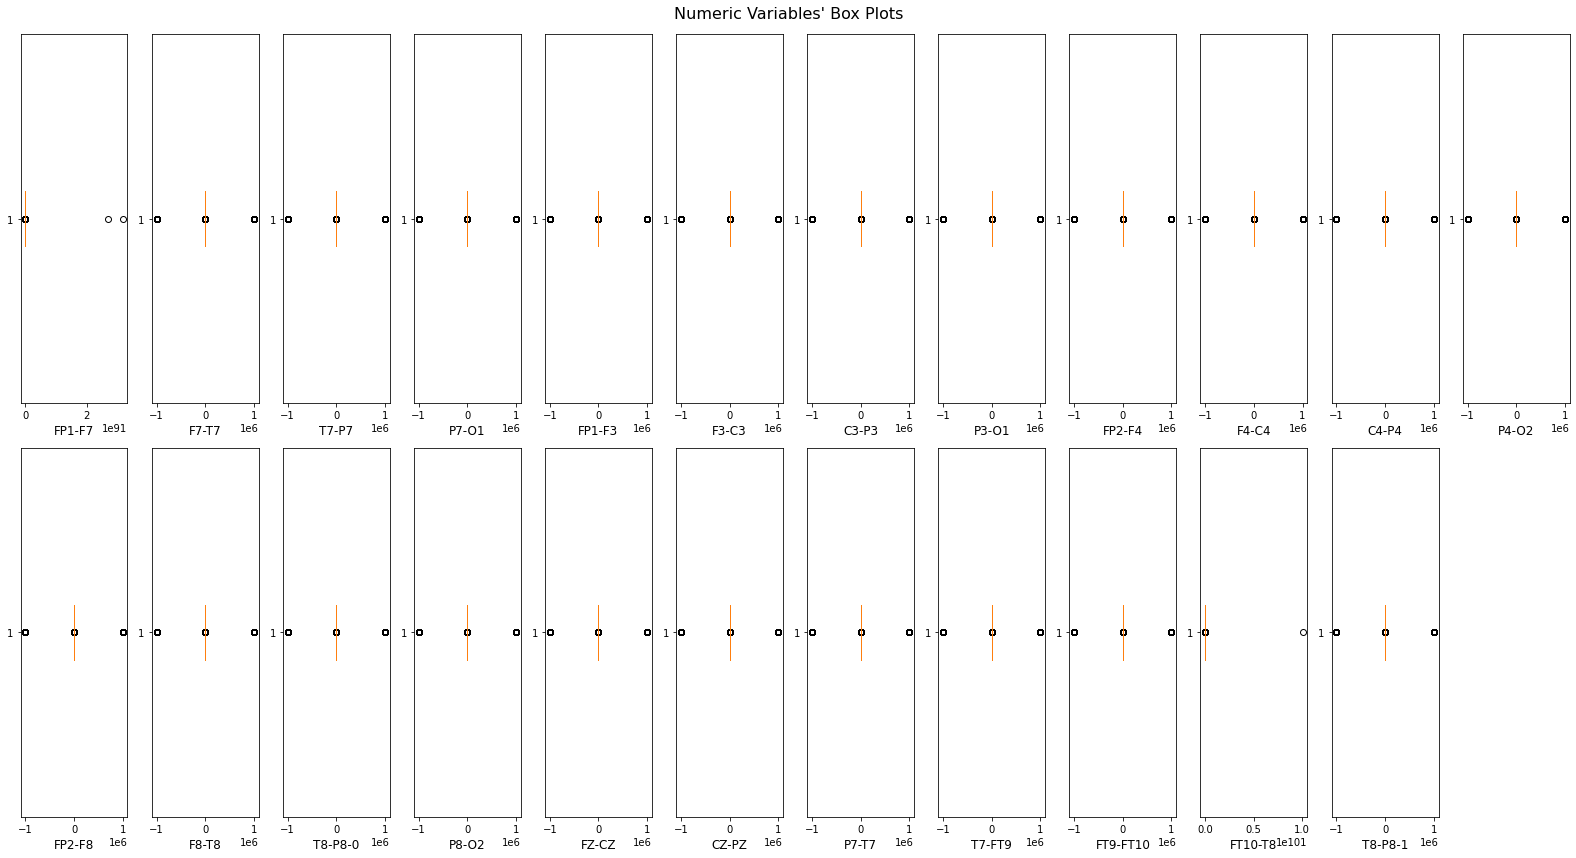

In [0]:
df_pandas = df_clean.select(neuron_vars).toPandas()

fig, axes = plt.subplots(2, ceil(len(neuron_vars) / 2), figsize=(22, 12))

for ax, col_name in zip(axes.flatten(), neuron_vars):
    values = df_pandas[col_name].dropna()
    
    if not values.empty:
        ax.boxplot(values, vert=False, patch_artist=True,
                   boxprops=dict(facecolor='blue', alpha=0.5))
        ax.set_xlabel(col_name, fontsize=12)

plt.suptitle("Numeric Variables' Box Plots", fontsize=16, y=0.99)

for ax in axes.flatten()[len(neuron_vars):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


**Clonclusions:**
- We see, that except for the maximum and minimum values at +-1.000.000, that we also saw at the data exploration, most values are very close to 0 (we also saw in data exploration that most values are between -0.0000xxxx and +0.0000xxxx). 

We want to check for the highest and lowest values that are not +-1.000.000, to see if there are other outliers.

To see the 20 highest values that are not 1.000.000:

In [0]:
n = len(neuron_vars)

stack_expr = "stack({}, {}) as (Column, Value)".format(
    n,
    ", ".join([f"'{col_name}', `{col_name}`" for col_name in neuron_vars])
)

stacked_df = df_clean.selectExpr(stack_expr)

filtered_df = stacked_df.filter(col("Value") < 1000000.0)

top_20_df = filtered_df.orderBy(col("Value").desc()).limit(20)

top_20_pandas = top_20_df.toPandas()
display(top_20_pandas)

Column Value FT10-T8 210402.9304 FP1-F7 186568.98656 FP1-F7 101391.94139 FT10-T8 32371.184371 FP1-F7 25377.289377 FT10-T8 16.27350427 FT10-T8 2.8229548229 FP1-F7 0.69333333333 FP1-F7 0.32019536019 FP1-F7 0.11623931623 FP1-F7 0.01275702075 FP1-F7 0.0033582417582 FT10-T8 0.00252210012 FP1-F7 0.0018443956043956 FT10-T8 0.0017541391941391 F3-C3 0.0017408547008547 FT10-T8 0.0017052991452991 T7-P7 0.0016865445665445 T7-FT9 0.0016560683760683 T8-P8-0 0.0016314529914529

To see the 20 lowest values that are not -1.000.000:

In [0]:
n = len(neuron_vars)

stack_expr = "stack({}, {}) as (Column, Value)".format(
    n,
    ", ".join([f"'{col_name}', `{col_name}`" for col_name in neuron_vars])
)

stacked_df = df_clean.selectExpr(stack_expr)

filtered_df = stacked_df.filter(col("Value") > -1000000.0)

top_20_df = filtered_df.orderBy(col("Value").asc()).limit(20)

top_20_pandas = top_20_df.toPandas()
display(top_20_pandas)

Column Value T8-P8-0 -0.001854945054945 T8-P8-1 -0.001854945054945 T8-P8-0 -0.001838144078144 T8-P8-1 -0.001838144078144 T8-P8-1 -0.0017994627594627 T8-P8-0 -0.0017994627594627 T8-P8-0 -0.0017971184371184 T8-P8-1 -0.0017971184371184 T8-P8-0 -0.0017455433455433 T8-P8-1 -0.0017455433455433 T8-P8-0 -0.00171663003663 T8-P8-1 -0.00171663003663 T8-P8-0 -0.0016916239316239 T8-P8-1 -0.0016916239316239 P7-T7 -0.0016861538461538 F7-T7 -0.0016748229548229 T8-P8-1 -0.0016658363858363 T8-P8-0 -0.0016658363858363 T8-P8-0 -0.0016529426129426 T8-P8-1 -0.0016529426129426

**Conclusions:**
- Based on these results and our previous analysis that showed that the values in each column should be in range very close to 0, it seems to reasonable to define 0.1 and -0.1 as our treshhold, and drop outliers outside of this range

As we decided, the next step was to drop outliers bigger than 0.1 and smaller than -0.1

In [0]:
filter_condition = None

for column in neuron_vars:
    if filter_condition is None:
        filter_condition = (col(column) >= -0.1) & (col(column) <= 0.1)
    else:
        filter_condition &= (col(column) >= -0.1) & (col(column) <= 0.1)

df_clean_2 = df_clean.filter(filter_condition)


#calculate total number of rows dropped, and percentage
rows_before = df_clean.count()
rows_after = df_clean_2.count()
num_deleted_rows = rows_before - rows_after
percentage_deleted = (num_deleted_rows / rows_before) * 100

print(f" number of dropped rows with outliers: {rows_before - rows_after}")
print(f" percentage of total rows dropped: {percentage_deleted:.2f}%")

 number of dropped rows with outliers: 74077
 percentage of total rows dropped: 2.30%


**Conclusions:**
- 2.3% of our total rows were dropped now, still a reasonable number

Now, we can see must better our data without the outliers in this boxplots 

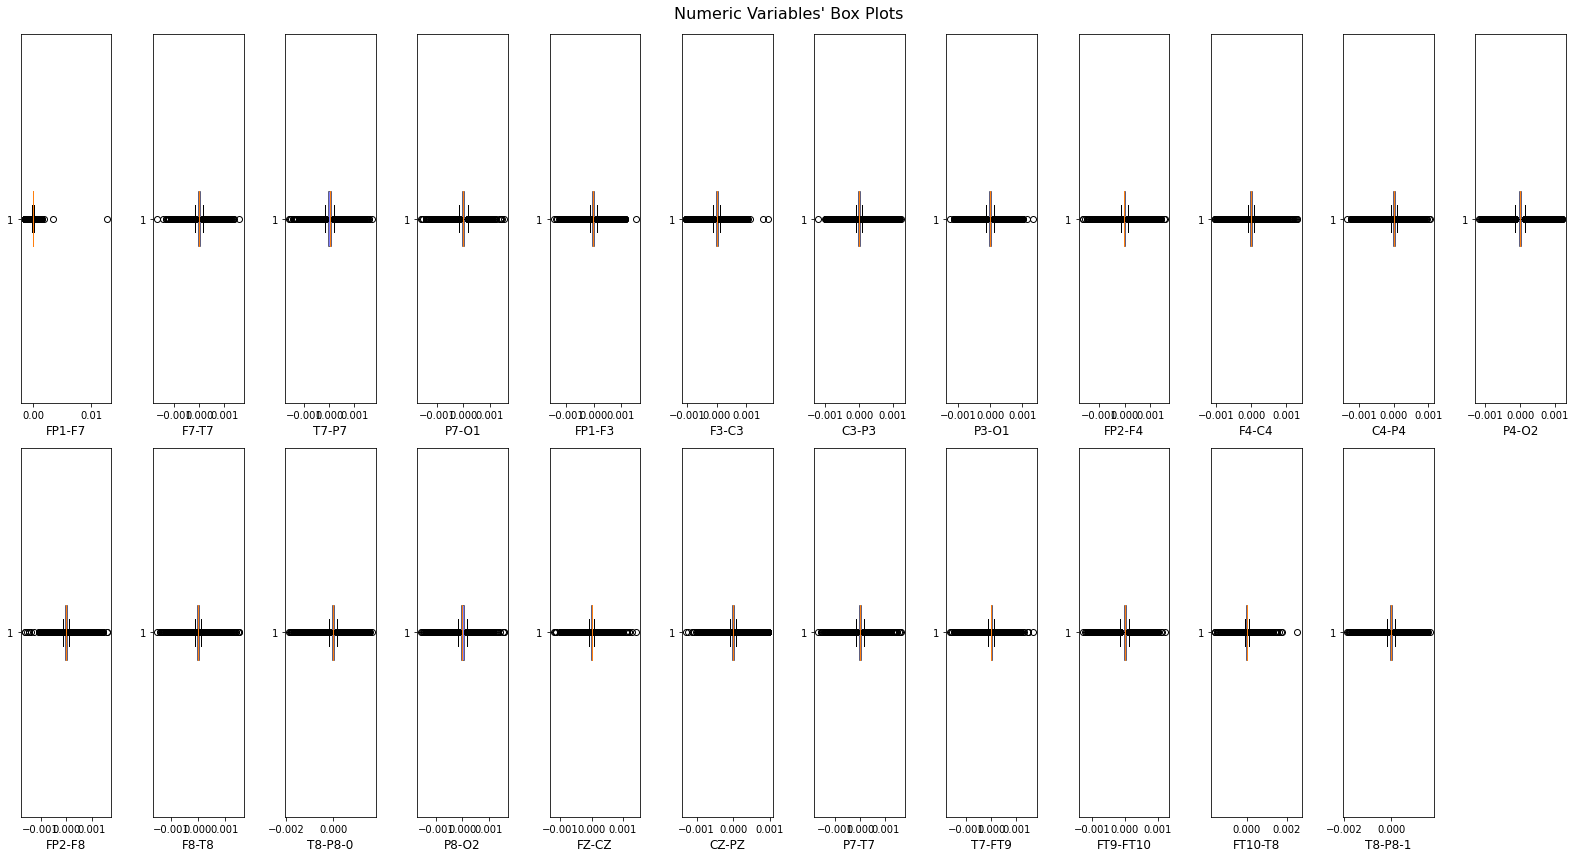

In [0]:
# with boxplots we show the distribution of the columns, and can see if obvious outliers exist

df_pandas = df_clean_2.select(neuron_vars).toPandas()

fig, axes = plt.subplots(2, ceil(len(neuron_vars) / 2), figsize=(22, 12))

for ax, col_name in zip(axes.flatten(), neuron_vars):
    values = df_pandas[col_name].dropna()
    
    if not values.empty:
        ax.boxplot(values, vert=False, patch_artist=True,
                   boxprops=dict(facecolor='blue', alpha=0.5))
        ax.set_xlabel(col_name, fontsize=12)

plt.suptitle("Numeric Variables' Box Plots", fontsize=16, y=0.99)

for ax in axes.flatten()[len(neuron_vars):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

**Conclusions:**
- We see that in two columns(first one and second last one) there are still some single values way higher than in other columns. 

We decide to slightly adjust our treshholds to drop all singular values that are clearly out of the range of the vast majority of the data, and in the context seem to be wrong values. So, we dropped 3 more values (> 0.0025 in FP1-F7 and FT10-T8).

In [0]:
#small adjustements, dropping 3 more values (> 0.0025 in FP1-F7 and FT10-T8)
filter_condition_2 = None

for column in neuron_vars:
    if filter_condition_2 is None:
        filter_condition_2 = col(column) <= 0.0025
    else:
        filter_condition_2 &= col(column) <= 0.0025

df_clean_3 = df_clean_2.filter(filter_condition_2)

rows_before_2 = df_clean_2.count()
rows_after_2 = df_clean_3.count()
num_deleted_rows_2 = rows_before_2 - rows_after_2
percentage_deleted_2 = (num_deleted_rows_2 / rows_before_2) * 100

print(f"additional outliers > 0.0025 dropped: {num_deleted_rows_2}")
print(f"percentage: {percentage_deleted_2:.2f}%")

additional outliers > 0.0025 dropped: 3
percentage: 0.00%


Apply same for test set and validation set:

In [0]:
#apply same for test set and validation set
filter_condition_3 = None

for column in neuron_vars:
    if filter_condition_3 is None:
        filter_condition_3 = col(column) <= 0.0025
    else:
        filter_condition_3 &= col(column) <= 0.0025

test_df = test_df.filter(filter_condition_3)
val_df = val_df.filter(filter_condition_3)

Only three additional rows have been dropped.

Here, we see a boxplot for these two adjusted features to see their distribution now:

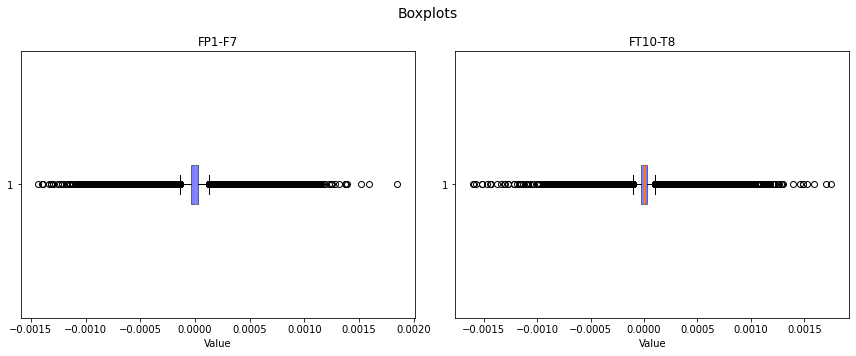

In [0]:
# boxplot for these two adjusted features to see their distribution now
selected_cols = ["FP1-F7", "FT10-T8"]
fig, axes = plt.subplots(1, len(selected_cols), figsize=(12, 5))

if len(selected_cols) == 1:
    axes = [axes]

for ax, col_name in zip(axes, selected_cols):
    values = [row[col_name] for row in df_clean_3.select(col_name).filter(col(col_name).isNotNull()).collect()]
    
    if len(values) > 0:
        ax.boxplot(values, vert=False, patch_artist=True, boxprops=dict(facecolor='blue', alpha=0.5))
        ax.set_title(col_name, fontsize=12)
        ax.set_xlabel("Value", fontsize=10)

plt.suptitle("Boxplots", fontsize=14)
plt.tight_layout()
plt.show()

<a class="anchor" id="eight-bullet"> 

## <span style="color:#FF007F"> 8. Visualizations </span> 

<a href="#top">Top &#129033;</a>

In this part, we want to analyze our data on the borders before and after blocks of data with label 2. 

We classifyed the labels as:
- Label 0: normal value
- Label 1: before an epilepsia
- Label 2: during the epilepsia

<span style="color:#FF007F"> 8.1 Look for borderpoints of first block of data with label 2 </span> 

First row with label 2 in the dataset:

In [0]:
# we look for the first row with label 2 in the data set
window_spec = Window.orderBy(lit(1))
df_numbered_start = df_clean_3.withColumn("row_num", row_number().over(window_spec))

w = Window.orderBy("row_num")
df_with_prev_start = df_numbered_start.withColumn("prev_label", lag("label").over(w))

label_start = df_with_prev_start.filter(
    (col("prev_label") != 2) & (col("label") == 2)
).orderBy("row_num").limit(1)

start_of_first_label2_block = label_start.collect()[0]["row_num"]

print(f"First label 2 is at row number = {start_of_first_label2_block}")


First label 2 is at row number = 466122


Last row of first block of label 2 in the dataset:

In [0]:
# we look for the last row with label 2 in the first group of rows with label 2

window_spec = Window.orderBy(lit(1))
df_numbered_5 = df_clean_3.withColumn("row_num", row_number().over(window_spec))

w = Window.orderBy("row_num")
df_with_prev = df_numbered_5.withColumn("prev_label", lag("label").over(w))

label_change = df_with_prev.filter(
    (col("prev_label") == 2) & (col("label") != 2)
).orderBy("row_num").limit(1)

boundary_row = label_change.collect()[0]["row_num"]

end_of_first_label2_block = boundary_row - 1

print(f"Last label 2 of first block of label 2 data is at row number = {end_of_first_label2_block}")

Last label 2 of first block of label 2 data is at row number = 495957


So the first block of rows with label 2 starts at row 466122 and consists of around 30.000 succesive rows with label 2.

In [0]:
#general data preparation for upcoming plots
features = ["FP1-F7", "F7-T7", "T7-P7", "P7-O1", "FP1-F3", "F3-C3", "C3-P3", "P3-O1",
            "FP2-F4", "F4-C4", "C4-P4", "P4-O2", "FP2-F8", "F8-T8", "T8-P8-0", "P8-O2",
            "FZ-CZ", "CZ-PZ", "P7-T7", "T7-FT9", "FT9-FT10", "FT10-T8", "T8-P8-1"]

window_spec = Window.orderBy(lit(1))
df_numbered = df_clean_3.withColumn("row_num", row_number().over(window_spec))

<span style="color:#FF007F"> 8.2 Area around beginning of first block of data with label 2 </span> 

We decided to see this in two perspectives: 
1. Plot of all features for this area

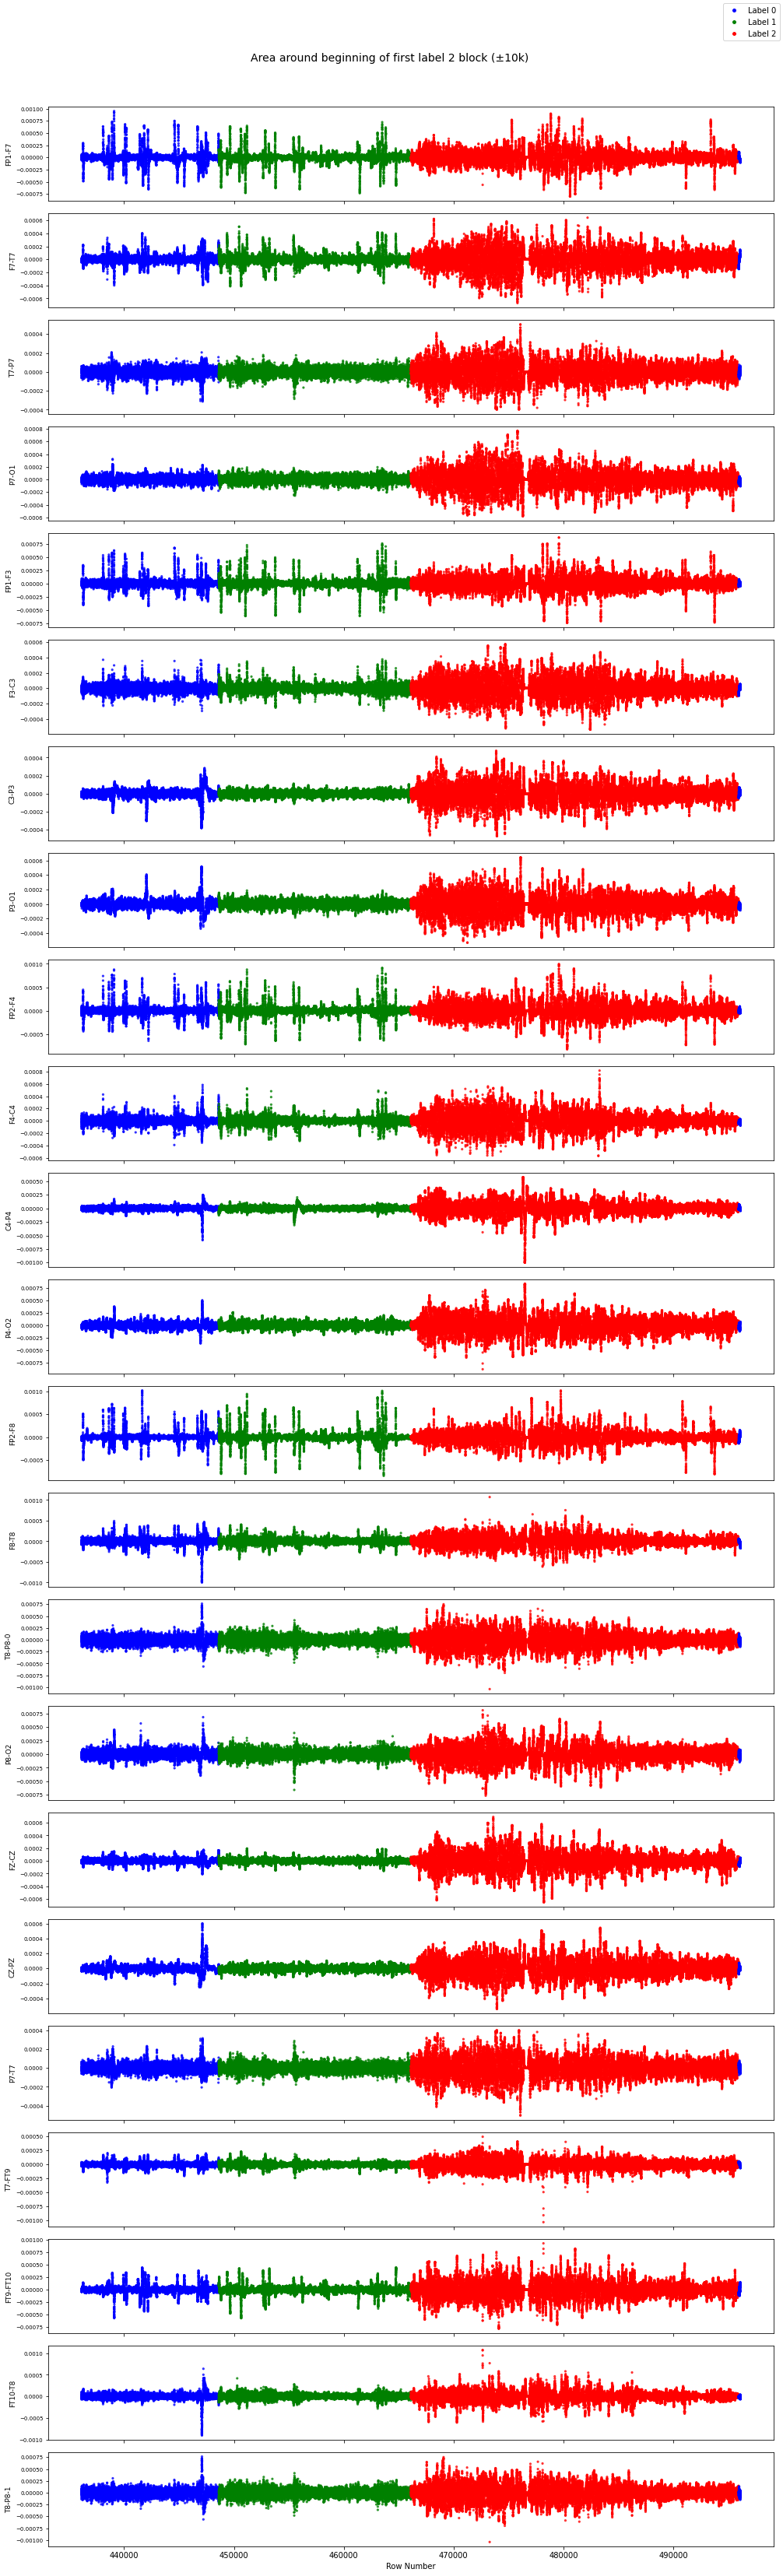

In [0]:
boundary_row = start_of_first_label2_block


df_focus = df_numbered.filter(
    (col("row_num") >= boundary_row - 30000) & (col("row_num") <= boundary_row + 30000)
)

df_pandas_focus = df_focus.select(["row_num", "label"] + features).toPandas()
df_pandas_focus["color"] = df_pandas_focus["label"].map({0: "blue", 1: "green", 2: "red"})

fig, axes = plt.subplots(len(features), 1, figsize=(14, 2 * len(features)), sharex=True)

for i, col_name in enumerate(features):
    axes[i].scatter(df_pandas_focus["row_num"], df_pandas_focus[col_name],
                    c=df_pandas_focus["color"], s=5, alpha=0.7)
    axes[i].set_ylabel(col_name, fontsize=9)
    axes[i].tick_params(axis='y', labelsize=7)
    if i < len(features) - 1:
        axes[i].tick_params(labelbottom=False)

axes[-1].set_xlabel("Row Number")
plt.suptitle("Area around beginning of first label 2 block (±10k)", fontsize=14)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Label 0', markerfacecolor='blue'),
    Line2D([0], [0], marker='o', color='w', label='Label 1', markerfacecolor='green'),
    Line2D([0], [0], marker='o', color='w', label='Label 2', markerfacecolor='red'),
]
fig.legend(handles=legend_elements, loc="upper right")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

**Conclusions:**
- A visible differences in the values during an epilepsia (red) compared to before (blue and green (right before) can be seen in all columns. The values are more extrem (higher and lower) during an epilepsia.

2. All features in one plot, around this area 

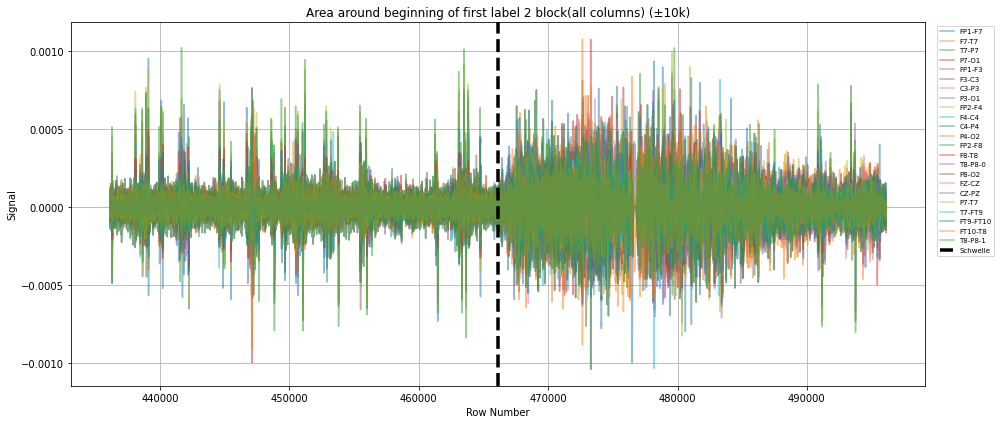

In [0]:
boundary_row = start_of_first_label2_block 


plt.figure(figsize=(14, 6))
for col_name in features:
    plt.plot(df_pandas_focus["row_num"], df_pandas_focus[col_name], alpha=0.5, label=col_name)

plt.axvline(x=boundary_row, color='black', linestyle='--', linewidth=3.5, label="Schwelle")

plt.title("Area around beginning of first label 2 block(all columns) (±10k)")
plt.xlabel("Row Number")
plt.ylabel("Signal")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=7)
plt.tight_layout()
plt.show()


**Conclusions:**
- This plot shows that also after grouping all neurons together, a clear difference before (left side) and during (right side) an epilepsia can be seen.

<span style="color:#FF007F"> 8.3 Area around end of first block of data with label 2  </span> 

As we did before, we decided to see this in two perspectives: 
1. Plot of all features for this area


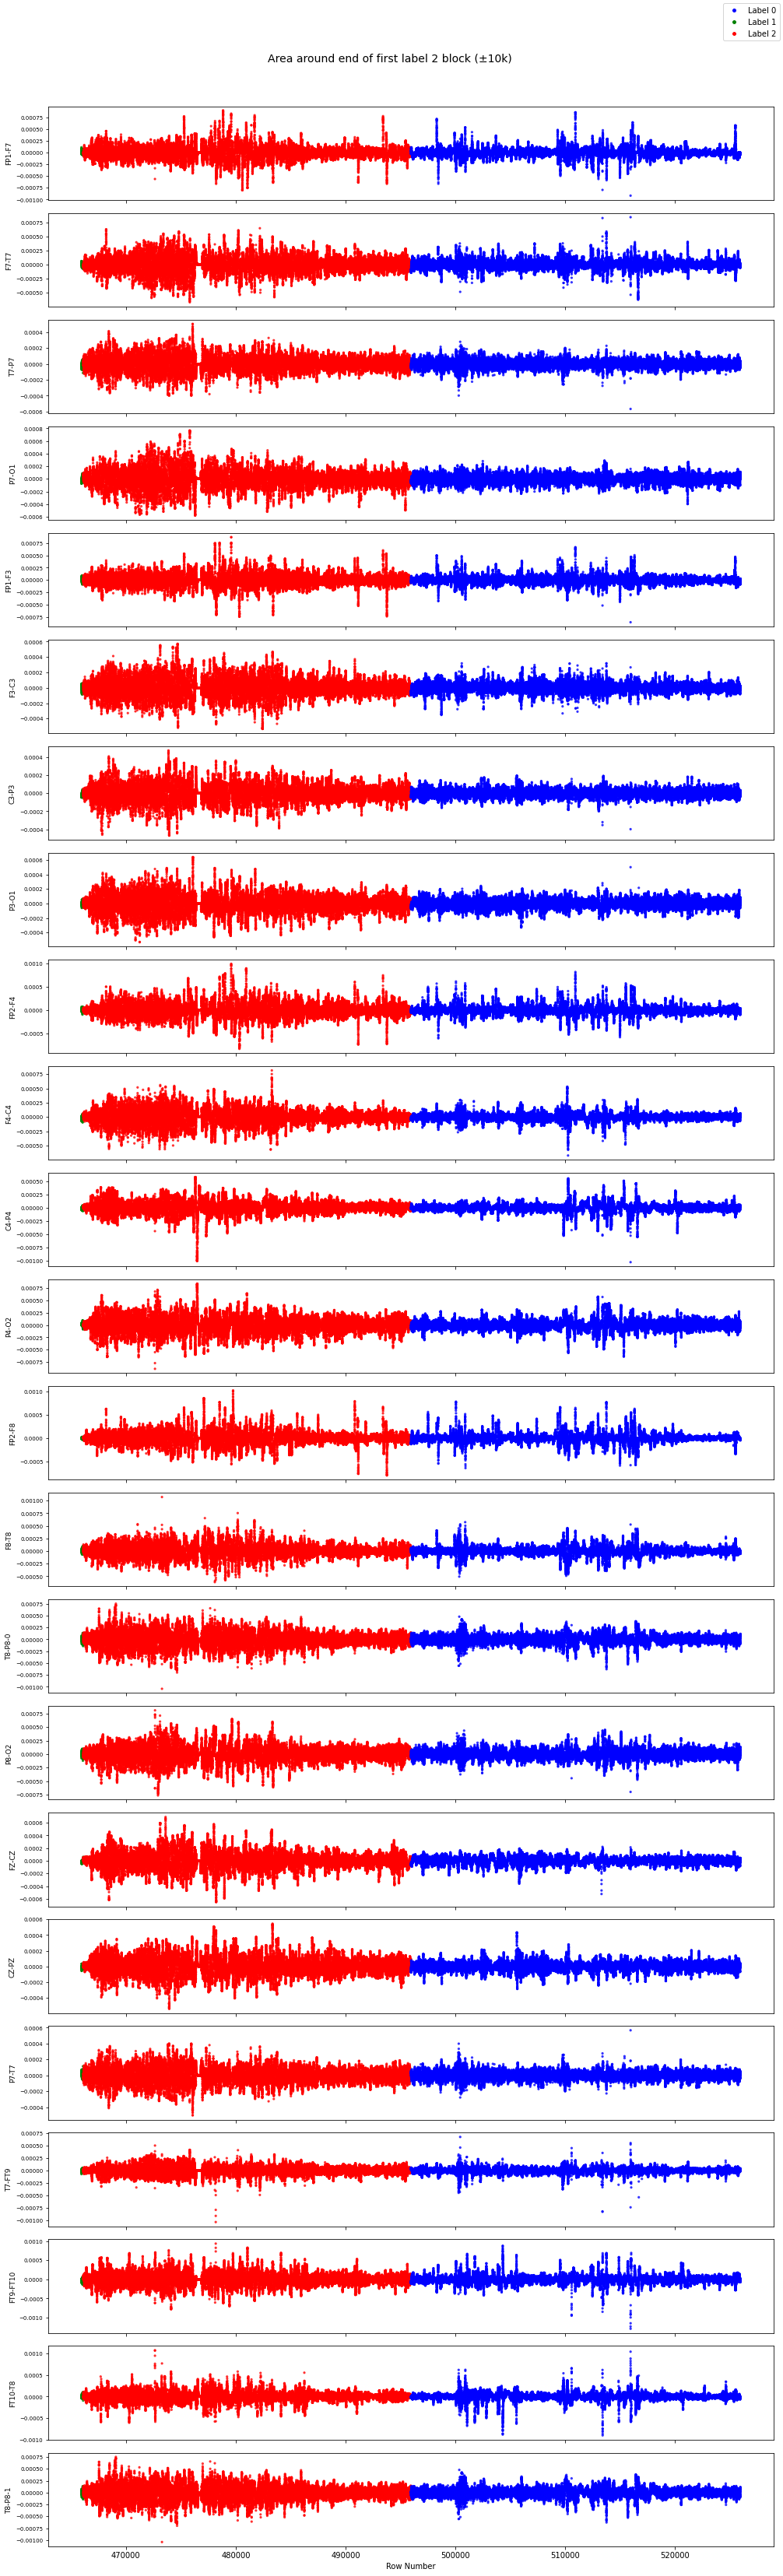

In [0]:
boundary_row = end_of_first_label2_block


df_focus = df_numbered.filter(
    (col("row_num") >= boundary_row - 30000) & (col("row_num") <= boundary_row + 30000)
)

df_pandas_focus = df_focus.select(["row_num", "label"] + features).toPandas()
df_pandas_focus["color"] = df_pandas_focus["label"].map({0: "blue", 1: "green", 2: "red"})

fig, axes = plt.subplots(len(features), 1, figsize=(14, 2 * len(features)), sharex=True)

for i, col_name in enumerate(features):
    axes[i].scatter(df_pandas_focus["row_num"], df_pandas_focus[col_name],
                    c=df_pandas_focus["color"], s=5, alpha=0.7)
    axes[i].set_ylabel(col_name, fontsize=9)
    axes[i].tick_params(axis='y', labelsize=7)
    if i < len(features) - 1:
        axes[i].tick_params(labelbottom=False)

axes[-1].set_xlabel("Row Number")
plt.suptitle("Area around end of first label 2 block (±10k)", fontsize=14)

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Label 0', markerfacecolor='blue'),
    Line2D([0], [0], marker='o', color='w', label='Label 1', markerfacecolor='green'),
    Line2D([0], [0], marker='o', color='w', label='Label 2', markerfacecolor='red'),
]
fig.legend(handles=legend_elements, loc="upper right")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

**Conclusions:**
- This shows that towards the end of an epilepsia (last red values), the values are not as extreme anymore and for some features almost indistinguible to the values right after an epilepsia (blue).
- In the middle of an epilepsia (first red values), the values are more extreme

2. All features in one plot, around this area 

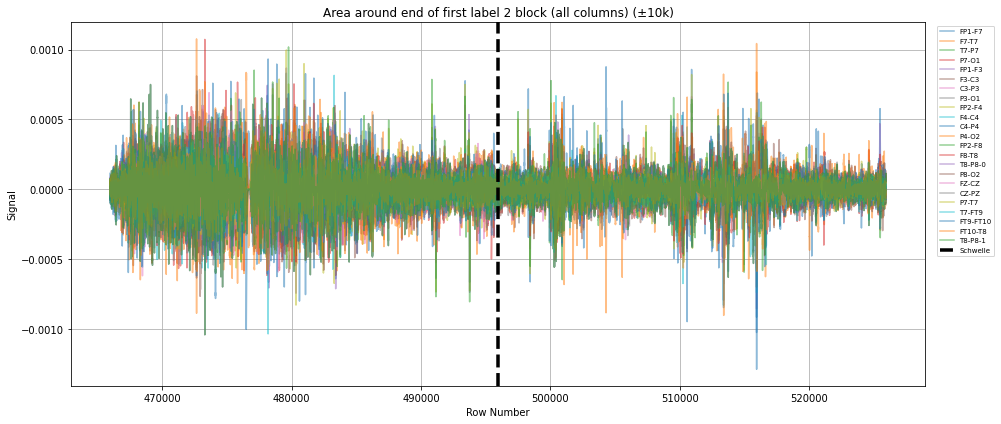

In [0]:
boundary_row = end_of_first_label2_block 

plt.figure(figsize=(14, 6))
for col_name in features:
    plt.plot(df_pandas_focus["row_num"], df_pandas_focus[col_name], alpha=0.5, label=col_name)

plt.axvline(x=boundary_row, color='black', linestyle='--', linewidth=3.5, label="Schwelle")

plt.title("Area around end of first label 2 block (all columns) (±10k)")
plt.xlabel("Row Number")
plt.ylabel("Signal")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=7)
plt.tight_layout()
plt.show()


**Conclusions:**
- This plot confirms previous analysis, during an epilepsia (beginning of left side) the values are more extrem, whilst towards the end of an epilepsia (end of left side) even the values of all features are almost indistinguible from the values after an epilepsia (right side)

<a class="anchor" id="nine-bullet"> 

## <span style="color:#FF007F"> 9. Export Datasets </span> 

<a href="#top">Top &#129033;</a>

In [0]:
# export the dataset
df_clean_3.coalesce(1).write.option("header", True).mode("overwrite").csv("dbfs:/FileStore/exports/AfterPreprocessing")

In [0]:
#export test and validation set
test_df.coalesce(1).write.option("header", True).mode("overwrite").csv("dbfs:/FileStore/exports/test_df")
val_df.coalesce(1).write.option("header", True).mode("overwrite").csv("dbfs:/FileStore/exports/val_df")